In [1]:
# https://arxiv.org/abs/cond-mat/0703314
# https://arxiv.org/abs/0808.3779

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
@jit(nopython=True)
def calc_rsks(L):
    rs = np.arange(1,L+1) ## from 1 to L
    ks = np.linspace(np.pi/(L+1.0),L*np.pi/(L+1.0),L)
    return rs,ks

@jit(nopython=True)
def calc_eks(J,ks):
    return -2.0*J*np.cos(ks)

@jit(nopython=True)
def calc_xkrs(L,ks,rs):
    return np.sqrt(2.0/(L+1.0))*np.sin(np.outer(ks,rs))

# #@jit(nopython=True)
# def calc_ys(t,eks,xkrs):
#     expeks = np.exp(1j*t*eks)
#     return np.einsum("ik,k,kj->ij",xkrs,expeks,xkrs)

@jit(nopython=True)
def calc_ys(t,eks,xkrs):
    xc = (1.0+0.0j)*xkrs # for numba
    expeks = np.diag(np.exp(1j*t*eks))
    return xc @ expeks @ xc

@jit(nopython=True)
def calc_fs(ys,state):
    diag = (1.0+0.0j)*np.diag(state)
    return ys @ diag @ ys.T.conjugate()

In [16]:
#L = 20
L = 100
L_A = L//2
J = 1.0
#ts = np.linspace(0,40,201)
ts = np.linspace(0,200,201)

rs, ks = calc_rsks(L)
eks = calc_eks(J,ks)
xkrs = calc_xkrs(L,ks,rs)
state = np.array([1.0 if i%2==0 else 0.0 for i in range(L)])

fss = []
fss_A = []
for t in ts:
    ys = calc_ys(t,eks,xkrs)
    fs = calc_fs(ys,state)
    fss.append(fs)
    fss_A.append(fs[0:L_A,0:L_A])
fss = np.array(fss)
fss_A = np.array(fss_A)

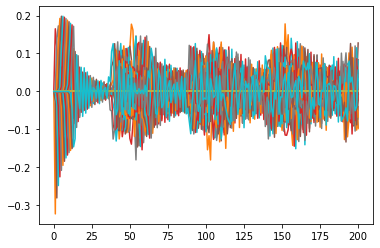

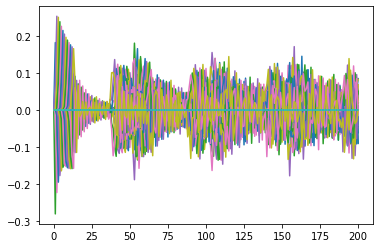

In [17]:
for r in rs[:len(rs)//2]:
    plt.plot(ts,fss[:,0,r].real)
plt.show()

for r in rs[:len(rs)//2]:
    plt.plot(ts,fss[:,0,r].imag)
plt.show()

In [18]:
print(np.allclose(fss_A[0],fss_A[0].T.conjugate()))
print(np.allclose(fss_A[10],fss_A[10].T.conjugate()))

True
True


In [19]:
ee1s = []
ee2s = []
for i,t in enumerate(ts):
    eig = np.linalg.eigvalsh(fss_A[i])
    peig = 1.0 + eig
    eig[eig<1e-16] = np.finfo(eig.dtype).eps
    peig[peig<1e-16] = np.finfo(peig.dtype).eps
    ee1 = - np.sum(eig*np.log(eig)) + np.sum(peig*np.log(peig))
    ee1s.append(ee1)
    ee2 = - np.log(np.sum(peig**2-eig**2))
    ee2s.append(ee2)

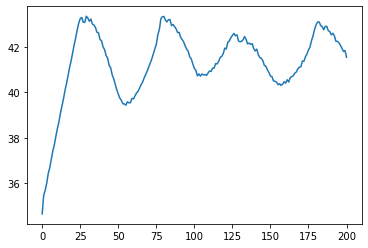

In [20]:
plt.plot(ts,ee1s)

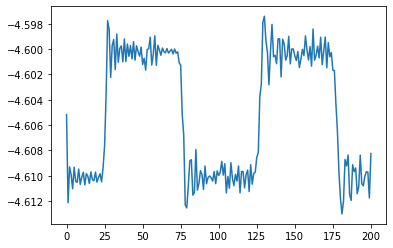

In [21]:
plt.plot(ts,ee2s)